# Q1

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import __main__

## Import dataset

In [2]:
# import (in google colab)
!gdown 1k2soBitLn6oU23YnEgkJh3byScFGLgc1
df = pd.read_csv('Perceptron.csv')
df

'# import in google colab\n!pip install --no-cache-dir gdown\n!gdown 1k2soBitLn6oU23YnEgkJh3byScFGLgc1\n'

In [3]:
'''# import (in jupyter notebook)
df = pd.read_csv('data/Perceptron.csv')
df'''

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0
...,...,...,...
395,0.574634,0.782211,-1.0
396,-1.413307,-0.673049,1.0
397,-0.465114,-1.290830,1.0
398,1.522055,0.948007,-1.0


## 1. train-test-split & modeling

In [4]:
X = df.iloc[:, 0:2]
y = df.iloc[:, 2:3]
y = np.where(y == -1, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320, 1), (80, 1))

In [5]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

In [6]:
X_train=np.asarray(X_train)
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_train.shape,X_train.shape

((320, 1), (320, 2))

In [7]:
#activation functions

def relu(x):
    return np.maximum(0, x)
     
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

In [8]:
#loss functions

def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [9]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

In [10]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = 5
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss.mean():.4f}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [11]:
# fitting the model

neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=100, eta=0.1, verbose=False)
neuron.fit(X_train, y_train)
neuron.parameters()

{'w': array([[-2.17219826],
        [-2.73640453]]),
 'b': 2.7389818597666107}

##  2. test evaluation and accuracy

In [12]:
y_hat = neuron.predict(X_test)
accuracy(y_test, y_hat, t=0.5)

0.975

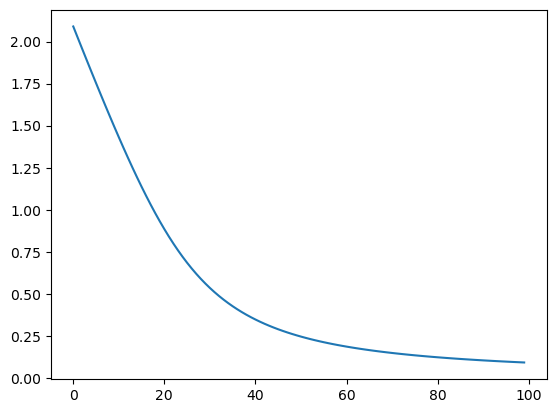

In [13]:
plt.plot(neuron.loss_hist)

In [14]:
X_train=np.asarray(X_train)
y_train_1d = np.ravel(y_train)

<Axes: >

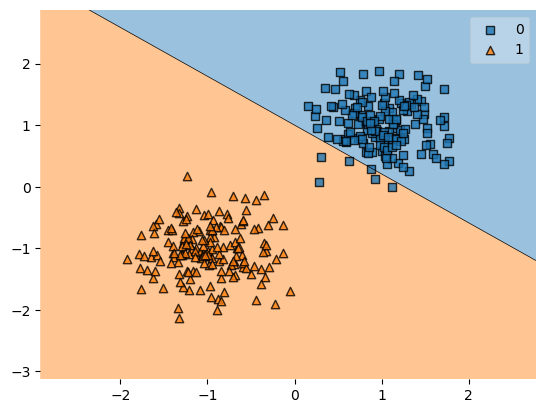

In [15]:
plot_decision_regions(X_train, y_train_1d, clf=neuron)

## 3. threshold changing & omitting the bias

In [16]:
#threshold

class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = 10
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose        
        
    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss.mean():.4f}')                
                
    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [17]:
# fitting the model

neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=100, eta=0.1, verbose=False)
neuron.fit(X_train, y_train)
neuron.parameters()

{'w': array([[-2.60960353],
        [-4.21637602]]),
 'b': 6.021208076198224}

In [18]:
y_hat = neuron.predict(X_test)
accuracy(y_test, y_hat, t=0.5)

0.8375

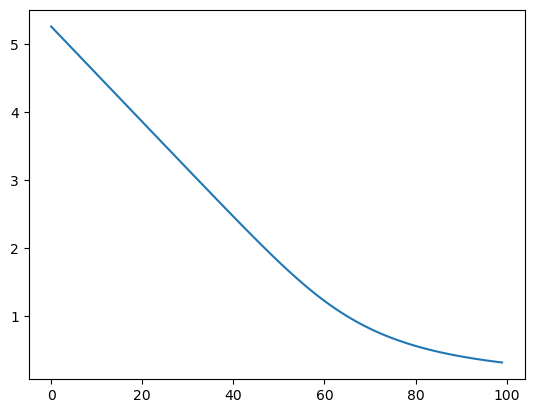

In [19]:
plt.plot(neuron.loss_hist)

In [20]:
X_train=np.asarray(X_train)
y_train_1d = np.ravel(y_train)

<Axes: >

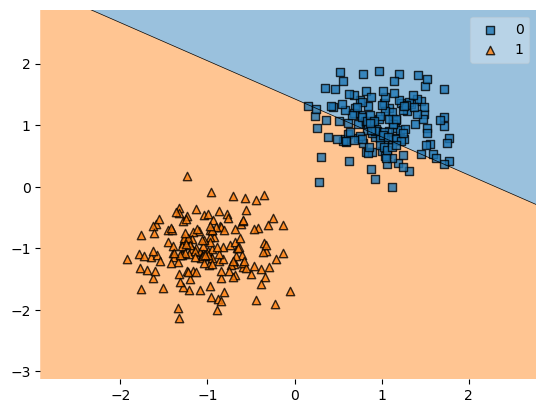

In [21]:
plot_decision_regions(X_train, y_train_1d, clf=neuron)

In [22]:
# bias 

class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = 0
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss.mean():.4f}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [23]:
neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=100, eta=0.1, verbose=False)
neuron.fit(X_train, y_train)
neuron.parameters()

{'w': array([[-1.73493934],
        [-1.45195735]]),
 'b': 0.036838419246040754}

In [24]:
y_hat = neuron.predict(X_test)
accuracy(y_test, y_hat, t=0.5)

1.0

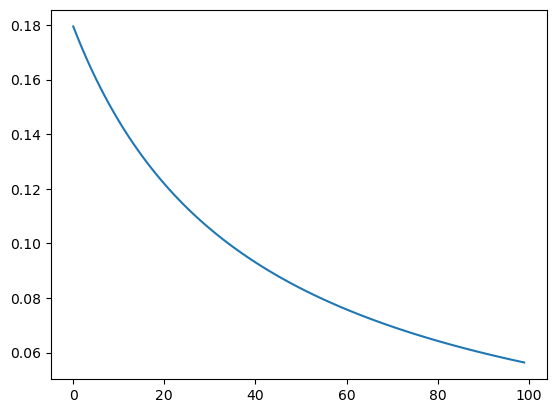

In [25]:
plt.plot(neuron.loss_hist)

In [26]:
X_train=np.asarray(X_train)
y_train_1d = np.ravel(y_train)

<Axes: >

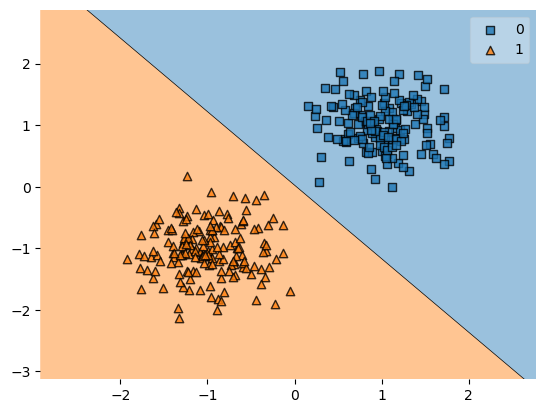

In [27]:
plot_decision_regions(X_train, y_train_1d, clf=neuron)